Questions to ask:
 - What is the age distribution and is it normal?
 - Is the variables correlated?
 - Can the images of the smoker and non-smoker be easily distinguished?

In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from colorama import Fore, Back, Style #color style


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [58]:
# Importing Machine Learning and Deep Learning Modules
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

from tqdm import tqdm
from PIL import Image
import pydicom

In [59]:
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [60]:
# Statistical Packages
from scipy.stats import shapiro
from scipy import stats 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import pickle
import gc
import pydicom


In [61]:
!conda install -y gdcm -c conda-forge

Solving environment: done

# All requested packages already installed.



In [62]:
# Reading the Dataset
train_fibro = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test_fibro = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')
sample_submission_fibro = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/sample_submission.csv')

In [63]:
# First rows of train dataset
train_fibro.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [64]:
# First rows of test dataset
test_fibro.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [65]:
# First rows of sample submission dataset
sample_submission_fibro.head()

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100
1,ID00421637202311550012437_-12,2000,100
2,ID00422637202311677017371_-12,2000,100
3,ID00423637202312137826377_-12,2000,100
4,ID00426637202313170790466_-12,2000,100


In [66]:
# Looking at the smoking status to sex
train_fibro.groupby(['SmokingStatus']).count()['Sex'].to_frame()

,Sex
SmokingStatus,
Currently smokes,82
Ex-smoker,1038
Never smoked,429


In [67]:
# Age status to sex
train_fibro.groupby(['Age']).count()['Sex'].to_frame()

,Sex
Age,
49,9
51,9
52,18
53,10
54,16
55,28
56,43
57,28
58,62


(array([ 36.,  97., 144., 220., 348., 357., 219.,  85.,  27.,  16.]),
 array([49. , 52.9, 56.8, 60.7, 64.6, 68.5, 72.4, 76.3, 80.2, 84.1, 88. ]),
 <a list of 10 Patch objects>)

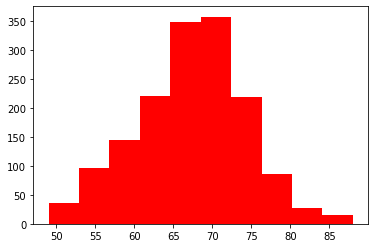

In [68]:
# Age Distribution
plt.hist(train_fibro['Age'], color='red')

In [69]:
# Creating the Deviation Column
train_fibro["Deviation"] = train_fibro['FVC']/train_fibro['Percent']
test_fibro['Deviation'] = test_fibro['FVC']/test_fibro['Percent']

In [70]:
# Looking at the train_fibro dataset again
train_fibro.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Deviation
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,39.74
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,39.74
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,39.74
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,39.74
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,39.74


In [71]:
# Looking at the test_fibro dataset again
test_fibro.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Deviation
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker,43.028
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker,33.384
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker,25.172
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker,41.560
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked,40.724


(array([ 62.,  77., 131.,  79.,  62., 270., 396., 288., 147.,  37.]),
 array([15.989 , 19.3133, 22.6376, 25.9619, 29.2862, 32.6105, 35.9348,
        39.2591, 42.5834, 45.9077, 49.232 ]),
 <a list of 10 Patch objects>)

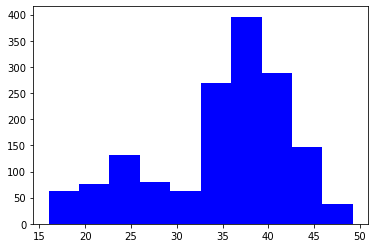

In [72]:
# Histogram of train_fibro deviation
plt.hist(train_fibro['Deviation'], color='blue')

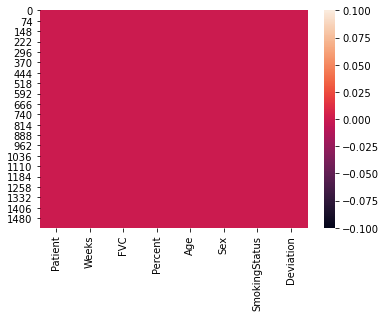

In [73]:
# Looking at Missing Values
train_fibro.isnull().sum() #Training dataset
sns.heatmap(train_fibro.isnull(), cbar='Magma')

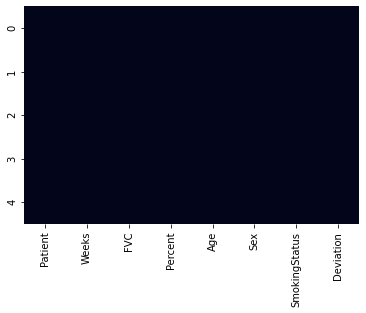

In [74]:
test_fibro.isnull().sum() #testing dataset

sns.heatmap(test_fibro.isnull(), cbar=False)

# This dataset has no missing values, let's march on to the analysis.

In [75]:
# Train Correlation
train_fibro.corr()

,Weeks,FVC,Percent,Age,Deviation
Weeks,1.000000,-0.041447,-0.012536,-0.059473,-0.033108
FVC,-0.041447,1.000000,0.671964,-0.094125,0.592811
Percent,-0.012536,0.671964,1.000000,0.095949,-0.166021
Age,-0.059473,-0.094125,0.095949,1.000000,-0.229066
Deviation,-0.033108,0.592811,-0.166021,-0.229066,1.000000


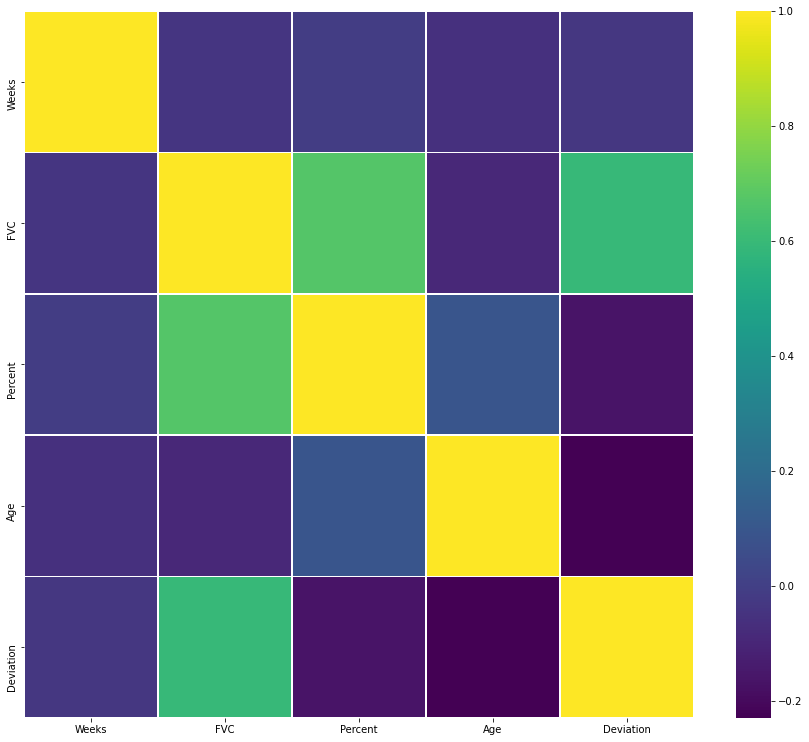

In [76]:
# Train Correlation Matrix
corr_matrix = train_fibro.corr() 
f, ax = plt.subplots(figsize =(15, 13)) 
sns.heatmap(corr_matrix, ax = ax, cmap = 'viridis', linewidths = 0.5) 

In [77]:
# Test Correlation
test_fibro.corr()

,Weeks,FVC,Percent,Age,Deviation
Weeks,1.000000,0.301601,0.822799,-0.641208,-0.007390
FVC,0.301601,1.000000,-0.111487,-0.066849,0.940731
Percent,0.822799,-0.111487,1.000000,-0.777114,-0.440779
Age,-0.641208,-0.066849,-0.777114,1.000000,0.187525
Deviation,-0.007390,0.940731,-0.440779,0.187525,1.000000


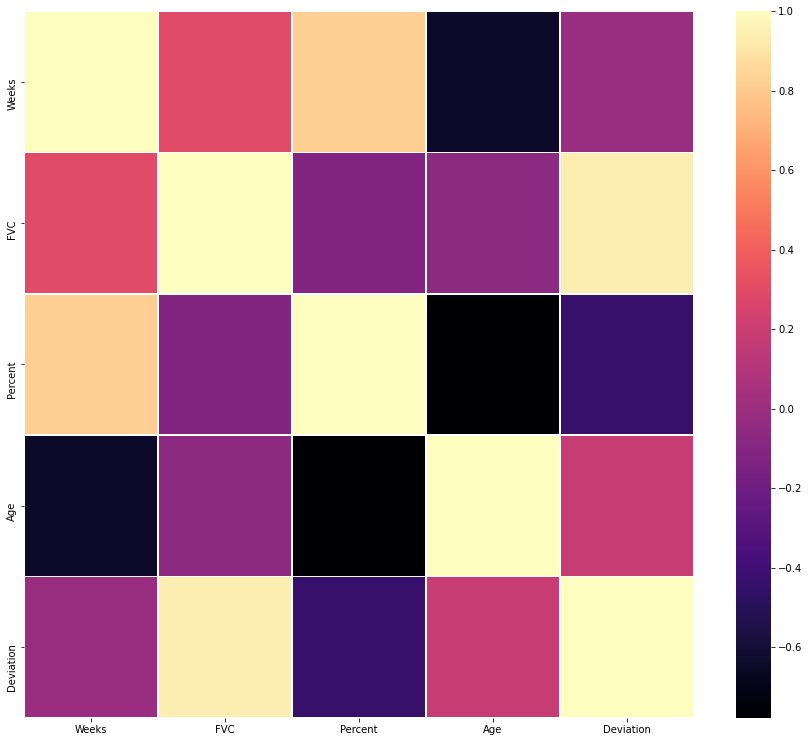

In [78]:
# Test Correlation Heatmap
corr_matrix = test_fibro.corr() 
f, ax = plt.subplots(figsize =(15, 13)) 
sns.heatmap(corr_matrix, ax = ax, cmap = 'magma', linewidths = 0.5) 

The test dataset has a higher correlation between the percent vs. weeks. The same result is happening with the train dataset as well.

In [79]:
# Looking for unique values
train_patient_id = set(train_fibro['Patient'].unique())
test_patient_id = set(test_fibro['Patient'].unique())

train_patient_id.intersection(test_patient_id)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

In [80]:
# Looking at the counts for the training dataset
print(train_fibro['Patient'].count(),train_fibro['Patient'].value_counts().shape[0])

1549 176


In [81]:
# Testing dataset counts
print(test_fibro['Patient'].count(),test_fibro['Patient'].value_counts().shape[0])

5 5


In [82]:
train_patient_ids = set(train_fibro['Patient'].unique())
test_patient_ids = set(test_fibro['Patient'].unique())

train_patient_ids.intersection(test_patient_ids)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

In [83]:
# Getting the column names on the training dataset
train_fibro_col = train_fibro.keys()
train_fibro_col = list(train_fibro_col)
print(train_fibro_col)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus', 'Deviation']


In [84]:
# Testing dataset for the column names
test_fibro_col = test_fibro.keys()
test_fibro_col = list(test_fibro_col)
print(test_fibro_col)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus', 'Deviation']


In [85]:
# Getting the Unique Patient counts
train_fibro['Patient'].value_counts().max()


10

In [86]:
# Testing version of it
test_fibro['Patient'].value_counts().max()


1

In [87]:
# Getting the 95% of confidence interval of the values for the patient
print(np.quantile(train_fibro['Patient'].value_counts(), 0.95))
print(np.quantile(test_fibro['Patient'].value_counts(), 0.95))

10.0
1.0


In [88]:
# Age differences
np.quantile(train_fibro['Age'].value_counts(), 0.75) - np.quantile(test_fibro['Age'].value_counts(), 0.25)


66.25

In [89]:
# Getting the value counts for the differences
np.quantile(train_fibro['Patient'].value_counts(), 0.75) - np.quantile(test_fibro['Patient'].value_counts(), 0.25)


8.0

In [90]:
# Looking at the PVC Variable at 5% significance
stat, p_value = shapiro(train_fibro['FVC'])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
    print('Sample resembles to Gaussian (fail to reject H0)')
else:
    print('reject H0')


Statistics=0.979, p=0.000
reject H0


In [91]:
# Fitting Lambda Values

_, lambda_fit = stats.boxcox(train_fibro['FVC']) 
print("Lambda Values: ", lambda_fit)


Lambda Values:  0.376401998544658


In [92]:
# Box-Cox Functions
def bctransform(x, lamb):
    part1 = x**lamb
    part2 = part1-1
    result = part2/lamb
    return result

def reversebct(x, lamb):
    x = np.where(x<0,0,x)
    part1 = x*lamb + 1
    result = part1**(1/lamb)
    return result

(array([ 57., 226., 395., 433., 228., 132.,  53.,  16.,   5.,   4.]),
 array([ 827. , 1384.2, 1941.4, 2498.6, 3055.8, 3613. , 4170.2, 4727.4,
        5284.6, 5841.8, 6399. ]),
 <a list of 10 Patch objects>)

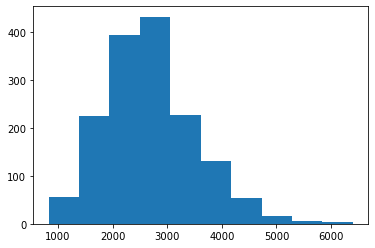

In [93]:
# Reverse Box Cox Transform
train_fitted = bctransform(train_fibro['FVC'], lamb=lambda_fit)
plt.hist(reversebct(train_fitted, lamb=lambda_fit))

In [94]:
# Shapiro Test on Box Cox Reverse
stat, p = shapiro(train_fitted)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')


Statistics=0.998, p=0.030
Reject H0


(array([ 57., 226., 395., 433., 228., 132.,  53.,  16.,   5.,   4.]),
 array([ 827. , 1384.2, 1941.4, 2498.6, 3055.8, 3613. , 4170.2, 4727.4,
        5284.6, 5841.8, 6399. ]),
 <a list of 10 Patch objects>)

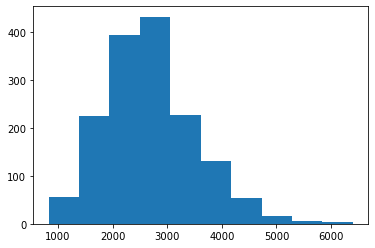

In [95]:
# Plotting distributions of fitted data in the training dataset
plt.hist(reversebct(train_fitted, lamb=lambda_fit))


In [96]:
# Boxplot
trace0 = go.Box(y=train_fibro["Age"],name="Age")
trace1 = go.Box(y=train_fibro["Percent"],name="Percent")


tracer = [trace0,  trace1]
iplot(tracer)

In [97]:
# Looking at the weeks distribution on the training dataset
train_fibro['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [98]:
# Looking at the weeks distribution on the test dataset
test_fibro['Weeks'].value_counts().head()

6     2
15    1
17    1
0     1
Name: Weeks, dtype: int64

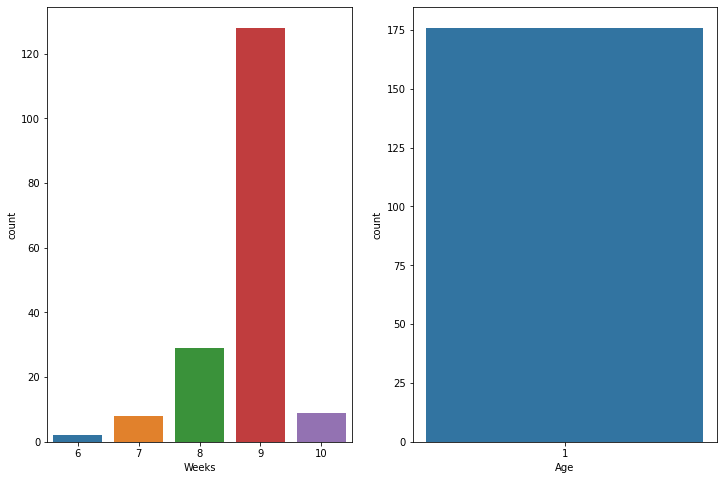

In [99]:
# Looking at how long the patient stays for lung treatment
fibro_weeks = train_fibro.groupby("Patient").agg({"Weeks":"nunique","Age":"nunique"}).reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
sns.countplot(fibro_weeks.Weeks,ax = ax1);
sns.countplot(fibro_weeks.Age,ax =ax2);


Week 9 has the highest counts for the patient recordings in the lung treatments. Each of them has 1 year age of difference.

# Weeks Distribution

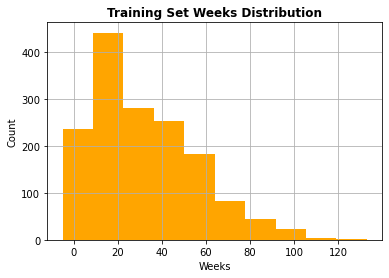

In [100]:
train_fibro['Weeks'].hist(color="orange")
plt.xlabel('Weeks') 
plt.ylabel('Count') 
plt.title('Training Set Weeks Distribution', 
          fontweight ="bold") 
  
plt.show() 

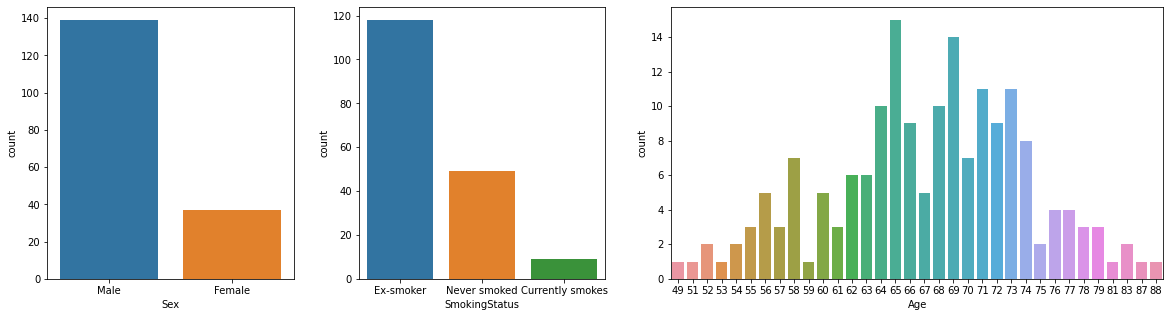

In [101]:
# Age Distribution
train_fibro_patients = train_fibro[["Patient","Sex","SmokingStatus","Age"]].drop_duplicates()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 5),gridspec_kw={'width_ratios': [1,1,2]})
sns.countplot(train_fibro_patients.Sex,ax = ax1);
sns.countplot(train_fibro_patients.SmokingStatus,ax =ax2);
sns.countplot(train_fibro_patients.Age,ax =ax3);


In [102]:
# Scatter Plot of Weeks vs. Age
figure = px.scatter(train_fibro, x="Weeks", y="Age", color='Sex')
figure.show()


In [103]:
# Bootstrap Preparation
train_fibro_boot_dev = np.array(train_fibro['Deviation'])

In [104]:
# Creating Bootstrap Model
train_fibro_bootstrap = []
for i in range(10000):
    np.random.seed(i)
    train_fibro_bootstrap.append((resample(train_fibro_boot_dev)))
print(len(train_fibro_bootstrap))

10000


In [105]:
# Calculating Bootstrap Means
bootstrap_means = np.mean(train_fibro_bootstrap, axis=1)
bootstrap_means

array([35.23519948, 34.87496514, 35.22018528, ..., 34.98256294,
       34.92262105, 35.13056359])

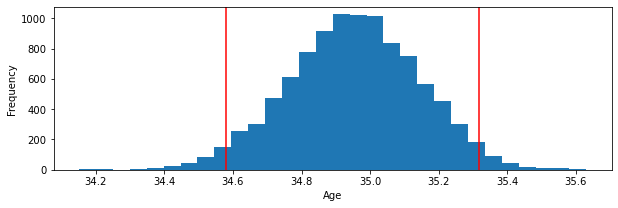

Lower bound: 34.57921856036152
Upper bound: 35.3161935926404


In [106]:
# Histogram of Bootstrap Means
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

fig = plt.figure(figsize=(10,3))
ax = plt.hist(bootstrap_means, bins=30)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.show()

print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))

In [107]:
# Creating CUSUM Model
# Calculating the Mean
def calc_mean(L):
    return calc_mean__1(L)

def calc_mean__1(L):
    if len(L) > 0:
        import numpy as np
        return float(np.mean(L))
    return 0.0

# Calculating the Cumulative Sum
def cusum(x, mu):
    out = [0]
    for i, elem in enumerate(x):
        out.append(max(0, out[i] + (elem - mu)))
    return out

# Index of the Cusum
def get_index(CS, alpha):
    for i, elem in enumerate(CS):
        if elem > alpha: return i
    return -1

# Identifying the Changes
def raise_alarm(x, alpha):
    mu = calc_mean(x)
    CS = cusum(x, mu)
    print(CS)
    out_index = get_index(CS, alpha)
    print(out_index)
    if out_index == -1: return (-1, None)
    else: return (out_index, x[out_index])
    
# Calculating the Mean Dynamic
def calc_mean_dynamic(L):
    fill = [0, 0, 0, 0]
    L_padded = fill + L
    mu = []
    for i in range(len(L)):
        mu.append(calc_mean(L_padded[i:i+4]))
    return mu

In [108]:
# Implementing the model
mu = train_fibro['Deviation'].mean()
x = train_fibro['Deviation'] #Looking at the Deviation column as created from the group
cum_sum = cusum(x, mu)
print(cum_sum)

[0, 4.7865229180114355, 9.573045836022871, 14.359568754034328, 19.1460916720458, 23.93261459005722, 28.71913750806864, 33.50566042608006, 38.292183344091555, 43.07870626210303, 51.04122918011449, 59.00375209812595, 66.96627501613742, 74.92879793414886, 82.89132085216032, 90.85384377017176, 98.81636668818321, 106.77888960619467, 114.74141252420611, 116.97993544221757, 119.218458360229, 121.45698127824042, 123.69550419625185, 125.9340271142633, 128.17255003227476, 130.41107295028618, 132.6495958682976, 134.88811878630904, 138.6146417043205, 142.34116462233197, 146.06768754034346, 149.7942104583549, 153.52073337636634, 157.24725629437776, 160.97377921238922, 164.70030213040064, 168.4268250484121, 169.94134796642356, 171.45587088443494, 172.97039380244638, 174.48491672045785, 175.9994396384693, 177.51396255648075, 179.0284854744922, 180.54300839250362, 182.0575313105151, 189.36805422852652, 196.67857714653798, 203.9891000645494, 211.29962298256083, 218.6101459005723, 225.92066881858372, 23

(array([398., 276., 299., 110.,  83.,  56.,  76., 106.,  58.,  88.]),
 array([   0.        ,  109.18466507,  218.36933015,  327.55399522,
         436.7386603 ,  545.92332537,  655.10799045,  764.29265552,
         873.47732059,  982.66198567, 1091.84665074]),
 <a list of 10 Patch objects>)

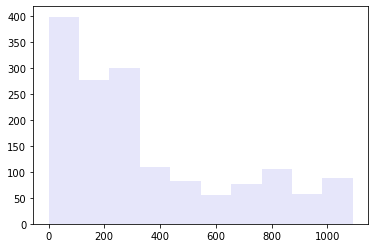

In [109]:
plt.hist(cum_sum, color='lavender')

In [110]:
# Installing Fastai
!pip install fastai2 -q

ERROR: kornia 0.3.1 has requirement torch==1.5.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: allennlp 1.0.0 has requirement torch<1.6.0,>=1.5.0, but you'll have torch 1.6.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [112]:
# Looking at the X-Ray Images
train_image_data = "../input/osic-pulmonary-fibrosis-progression/train"


In [113]:
# Looking up DCM Files
print(Fore.GREEN + 'Train .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/train'))), '\n' +
      Fore.BLUE + 'Test .dcm number of images:',Style.RESET_ALL, len(list(os.listdir('../input/osic-pulmonary-fibrosis-progression/test'))), '\n' +
      '--------------------------------', '\n' +
      'There is the same number of images as in train/ test .csv datasets')

Train .dcm number of images:  176 
Test .dcm number of images:  5 
-------------------------------- 
There is the same number of images as in train/ test .csv datasets


In [114]:
def pix_array(dataset, figsize=(10,8)):
    plt.figure(figsize=figsize)
    plt.grid(False)
    plt.imshow(dataset.pix_array, cmap='gray') # cmap=plt.cm.bone (color))
    plt.show()

total images for patient ID00007637202177411956430:  30


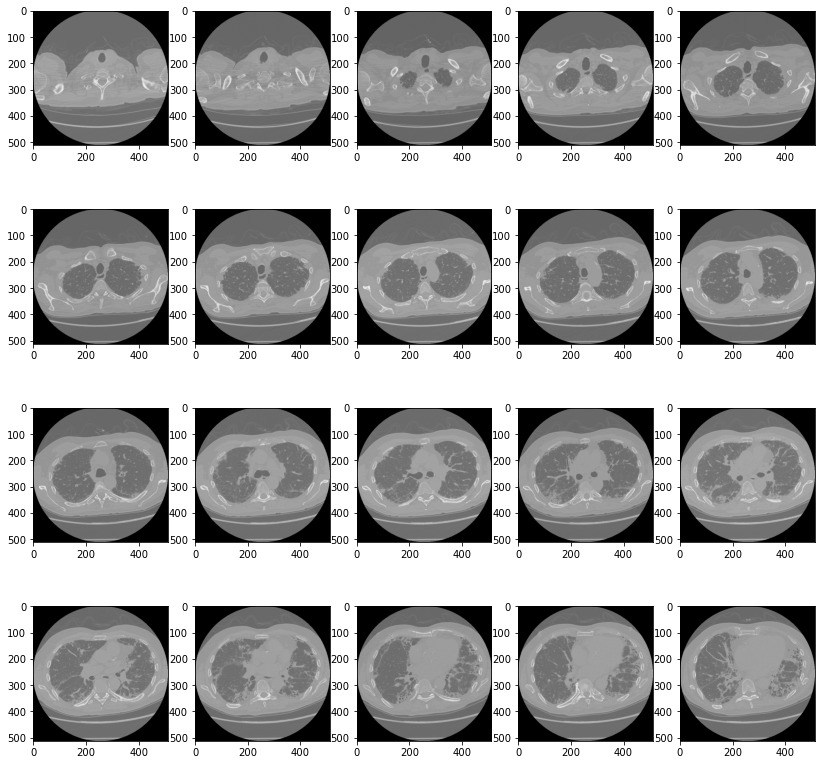

In [115]:
# Smoker
dir_image = "../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430"
print("total images for patient ID00007637202177411956430: ", len(os.listdir(dir_image)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(14, 14))
columns = 5
rows = 4
imglist = os.listdir(dir_image)
for i in range(1, columns*rows +1):
    filename = dir_image + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='gray')
plt.show()

total images for patient ID00426637202313170790466:  408


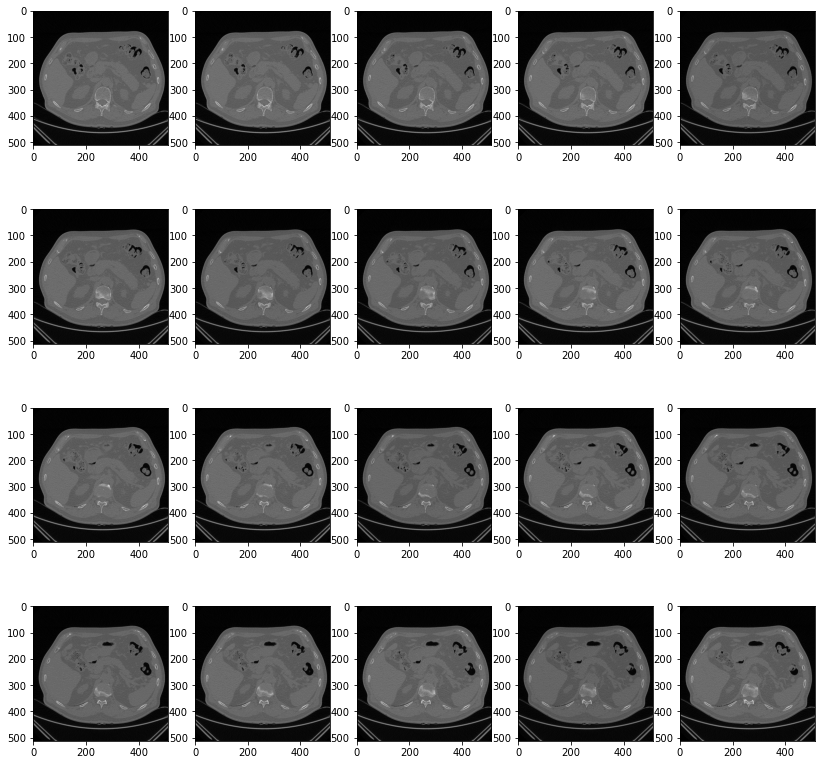

In [116]:
# Patient ID00426637202313170790466 (Non-Smoker)

dir_image = "../input/osic-pulmonary-fibrosis-progression/test/ID00426637202313170790466"
print("total images for patient ID00426637202313170790466: ", len(os.listdir(dir_image)))

# view first (columns*rows) images in order
fig=plt.figure(figsize=(14, 14))
columns = 5
rows = 4
imglist = os.listdir(dir_image)
for i in range(1, columns*rows +1):
    filename = dir_image + "/" + str(i) + ".dcm"
    ds = pydicom.dcmread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap='gray')
plt.show()

# References:
- https://www.kaggle.com/piantic/osic-pulmonary-fibrosis-progression-basic-eda
- https://www.kaggle.com/yeayates21/osic-image-data-prep-and-baseline-regression-model
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
